VIDEO TO AUDIO CONVERTER

In [1]:
!pip install ibm_watson
!brew install ffmpeg

==> Downloading https://formulae.brew.sh/api/formula.jws.json
######################################################################### 100.0%
==> Downloading https://formulae.brew.sh/api/cask.jws.json
######################################################################### 100.0%
To reinstall 6.0_1, run:
  brew reinstall ffmpeg


In [2]:
import subprocess
from ibm_watson import SpeechToTextV1
from ibm_watson.websocket import RecognizeCallback, AudioSource
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [3]:
command = 'ffmpeg -i aiml.mkv.mp4 -ab 160k -ar 44100 -vn audio.wav'
subprocess.call(command, shell=True)

ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --di

1

INSTALLING WHISPER FOR SPEECH TO TEXT

In [4]:
! pip install git+https://github.com/openai/whisper.git

  Cloning https://github.com/openai/whisper.git to /private/var/folders/0v/049x_pd116q79nt2zvqz2gwm0000gn/T/pip-req-build-_0sop33i
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /private/var/folders/0v/049x_pd116q79nt2zvqz2gwm0000gn/T/pip-req-build-_0sop33i
  Resolved https://github.com/openai/whisper.git to commit fcfeaf1b61994c071bba62da47d7846933576ac9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [5]:
!pip install pandas

In [6]:
!pip install torchaudio

In [7]:
!pip install scipy

FLEUR DATASET FOR LANGUAGE SELECTION

In [1]:
import io
import os
import numpy as np

try:
    import tensorflow  # required in Colab to avoid protobuf compatibility issues
except ImportError:
    pass

import torch
import pandas as pd
import urllib
import tarfile
import whisper
import torchaudio

from scipy.io import wavfile
from tqdm.notebook import tqdm


pd.options.display.max_rows = 100
pd.options.display.max_colwidth = 1000
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
!pip install --upgrade whisper
!pip install --upgrade ipywidgets

In [4]:
import whisper

model = whisper.load_model("medium")

LANGUAGE SELECTION

In [5]:
import ipywidgets as widgets

languages = {"af_za": "Afrikaans", "am_et": "Amharic", "ar_eg": "Arabic", "as_in": "Assamese", "az_az": "Azerbaijani", "be_by": "Belarusian", "bg_bg": "Bulgarian", "bn_in": "Bengali", "bs_ba": "Bosnian", "ca_es": "Catalan", "cmn_hans_cn": "Chinese", "cs_cz": "Czech", "cy_gb": "Welsh", "da_dk": "Danish", "de_de": "German", "el_gr": "Greek", "en_us": "English", "es_419": "Spanish", "et_ee": "Estonian", "fa_ir": "Persian", "fi_fi": "Finnish", "fil_ph": "Tagalog", "fr_fr": "French", "gl_es": "Galician", "gu_in": "Gujarati", "ha_ng": "Hausa", "he_il": "Hebrew", "hi_in": "Hindi", "hr_hr": "Croatian", "hu_hu": "Hungarian", "hy_am": "Armenian", "id_id": "Indonesian", "is_is": "Icelandic", "it_it": "Italian", "ja_jp": "Japanese", "jv_id": "Javanese", "ka_ge": "Georgian", "kk_kz": "Kazakh", "km_kh": "Khmer", "kn_in": "Kannada", "ko_kr": "Korean", "lb_lu": "Luxembourgish", "ln_cd": "Lingala", "lo_la": "Lao", "lt_lt": "Lithuanian", "lv_lv": "Latvian", "mi_nz": "Maori", "mk_mk": "Macedonian", "ml_in": "Malayalam", "mn_mn": "Mongolian", "mr_in": "Marathi", "ms_my": "Malay", "mt_mt": "Maltese", "my_mm": "Myanmar", "nb_no": "Norwegian", "ne_np": "Nepali", "nl_nl": "Dutch", "oc_fr": "Occitan", "pa_in": "Punjabi", "pl_pl": "Polish", "ps_af": "Pashto", "pt_br": "Portuguese", "ro_ro": "Romanian", "ru_ru": "Russian", "sd_in": "Sindhi", "sk_sk": "Slovak", "sl_si": "Slovenian", "sn_zw": "Shona", "so_so": "Somali", "sr_rs": "Serbian", "sv_se": "Swedish", "sw_ke": "Swahili", "ta_in": "Tamil", "te_in": "Telugu", "tg_tj": "Tajik", "th_th": "Thai", "tr_tr": "Turkish", "uk_ua": "Ukrainian", "ur_pk": "Urdu", "uz_uz": "Uzbek", "vi_vn": "Vietnamese", "yo_ng": "Yoruba"}
selection = widgets.Dropdown(
    options=[("Select language", None), ("----------", None)] + sorted([(f"{v} ({k})", k) for k, v in languages.items()]),
    value="en_us",
    description='Language:',
    disabled=False,
)

selection

Dropdown(description='Language:', index=18, options=(('Select language', None), ('----------', None), ('Afrika…

In [6]:
lang = selection.value
language = languages[lang]

assert lang is not None, "Please select a language"
print(f"Selected language: {language} ({lang})")

Selected language: English (en_us)


In [7]:
from scipy.io import wavfile

# Read the audio file
sample_rate, audio_data = wavfile.read("audio.wav")

In [8]:
print("Audio Data Shape:", audio_data.shape)
print("Audio Data Type:", audio_data.dtype)

Audio Data Shape: (23147520, 2)
Audio Data Type: int16


In [9]:
print("Sample Rate:", sample_rate)

Sample Rate: 44100


In [10]:
!pip install librosa

In [13]:
import librosa
import numpy as np
from scipy.io import wavfile

# Assuming you have the variable `audio_data` containing the original audio data

# Convert stereo to mono and convert to floating-point format
audio_data_mono = librosa.to_mono(audio_data.T.astype(np.float32))

# Resample to the target sample rate (16,000 Hz)
target_sample_rate = 16000
audio_data_resampled = librosa.resample(audio_data_mono, orig_sr=sample_rate, target_sr=target_sample_rate)

# Save the resampled audio data as a WAV file
output_file_path = "audio.wav"
wavfile.write(output_file_path, target_sample_rate, audio_data_resampled)

In [ ]:
transcription = model.transcribe(audio_data, language=language)

FLEURS AUDIO DATASET

In [11]:
def download(url: str, target_path: str):
    with urllib.request.urlopen(url) as source, open(target_path, "wb") as output:
        with tqdm(total=int(source.info().get("Content-Length")), ncols=80, unit='iB', unit_scale=True, unit_divisor=1024) as loop:
            while True:
                buffer = source.read(8192)
                if not buffer:
                    break

                output.write(buffer)
                loop.update(len(buffer))


class Fleurs(torch.utils.data.Dataset):
    """
    A simple class to wrap Fleurs and subsample a portion of the dataset as needed.
    """
    def __init__(self, lang, split="test", subsample_rate=1, device=DEVICE):
        url = f"https://storage.googleapis.com/xtreme_translations/FLEURS102/{lang}.tar.gz"
        tar_path = os.path.expanduser(f"~/.cache/fleurs/{lang}.tgz")
        os.makedirs(os.path.dirname(tar_path), exist_ok=True)

        if not os.path.exists(tar_path):
            download(url, tar_path)

        all_audio = {}
        with tarfile.open(tar_path, "r:gz") as tar:
            for member in tar.getmembers():
                name = member.name
                if name.endswith(f"{split}.tsv"):
                    labels = pd.read_table(tar.extractfile(member), names=("id", "file_name", "raw_transcription", "transcription", "_", "num_samples", "gender"))

                if f"/{split}/" in name and name.endswith(".wav"):
                    audio_bytes = tar.extractfile(member).read()
                    all_audio[os.path.basename(name)] = wavfile.read(io.BytesIO(audio_bytes))[1]                    

        self.labels = labels.to_dict("records")[::subsample_rate]
        self.all_audio = all_audio
        self.device = device

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, item):
        record = self.labels[item]
        audio = torch.from_numpy(self.all_audio[record["file_name"]].copy())
        text = record["transcription"]
        
        return (audio, text)

In [12]:
dataset = Fleurs(lang, subsample_rate=10)  # subsample 10% of the dataset for a quick demo

CHECKING WHETHER MODEL IS MULTILINGUAL OR ENGLISH-ONLY

In [13]:
model = whisper.load_model("medium")
print(
    f"Model is {'multilingual' if model.is_multilingual else 'English-only'} "
    f"and has {sum(np.prod(p.shape) for p in model.parameters()):,} parameters."
)

Model is multilingual and has 762,321,920 parameters.


DEFINING DICTIONARIES

In [14]:
options = dict(language=language, beam_size=5, best_of=5)
transcribe_options = dict(task="transcribe", **options)
translate_options = dict(task="translate", **options)

TRANSCRIBING AND TRANSLATING THE AUDIO FROM THE MODEL

In [15]:
references = []
transcriptions = []
translations = []

for audio, text in tqdm(dataset):
    transcription = model.transcribe(audio, **transcribe_options)["text"]
    translation = model.transcribe(audio, **translate_options)["text"]
    
    transcriptions.append(transcription)
    translations.append(translation)
    references.append(text)

  0%|          | 0/65 [00:00<?, ?it/s]

/Users/apeksharajput/venv/lib/python3.9/site-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


DATAFRAME WHICH COMBINES REF. TEXTS, TRANSCRIPTIONS AND TRANSLATIONS INTO SINGLE TABLE

In [16]:
data = pd.DataFrame(dict(reference=references, transcription=transcriptions, translation=translations))
data

reference  \
0                                                                                                                                                                                                                                                                                                                                                                                                         unfortunately studying traffic flow is difficult because driver behavior cannot be predicted with one-hundred percent certainty   
1                                                                                                                                                                                                                                                                                                                                                                                                     popular sports include football basketball volleyball water-polo fencing rugby cycling ice hockey roller hockey and f1 motor racing   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                 the governor's office said nineteen of the injured were police officers   
3                                                                                                                                                                                                                                                                                                                                                                                                       in its early days the show was featured solely at the long-running internet radio site toginet radio a site focused on talk radio   
4                                                                                                                                                                                                                                                                                                                                                                                                                         after the dam was built in 1963 the seasonal floods that would spread sediment throughout the river were halted   
5                                                                                                                                                                                                                                                                                                                                                                                                                                                          first most riders wear riding boots with a heel and a smooth quite narrow sole   
6                                                                                                                                                                                                                                                                                                                                                                                                                                                                   in the warm climate of the middle east the house was not so important   
7                                                                                                                                                                                                                                                                                                                       

DYNAMIC TIME WRAPPING
measures similarity between two sequences which may vary in time

In [17]:
! pip install dtw-python

LIBRARIES RELATED TO VISUALIZATION AND DISTANCE CALCULATION

In [18]:
!pip install matplotlib

In [19]:
import string
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker

from IPython.display import display, HTML
from whisper.tokenizer import get_tokenizer
from dtw import dtw
from scipy.ndimage import median_filter

%matplotlib inline
%config InlineBackend.figure_format = "retina"

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [20]:
AUDIO_SAMPLES_PER_TOKEN = whisper.audio.HOP_LENGTH * 2
AUDIO_TIME_PER_TOKEN = AUDIO_SAMPLES_PER_TOKEN / whisper.audio.SAMPLE_RATE

medfilt_width = 7
qk_scale = 1.0

tokenizer = get_tokenizer(model.is_multilingual, language=languages[lang])

DOWNLOADING FONT

In [21]:
# This part downloads a repackaged version of the Noto Sans font (either CJK or non-CJK)
# to render various languages in Matplotlib figures.

if languages[lang] in {"Chinese", "Japanese", "Korean"}:
    font = "GoNotoCJKCore.ttf"
else:
    font = "GoNotoCurrent.ttf"

font_release = "https://github.com/satbyy/go-noto-universal/releases/download/v5.2"
if not os.path.exists(font):
    download(f"{font_release}/{font}", font)

prop = fm.FontProperties(fname=font)
props = {'fontproperties': prop}

PYTORCH TENSOR FOR SPILTTING WORDS

In [22]:
def split_tokens_on_unicode(tokens: torch.Tensor):
    words = []
    word_tokens = []
    current_tokens = []
    
    for token in tokens.tolist():
        current_tokens.append(token)
        decoded = tokenizer.decode_with_timestamps(current_tokens)
        if "\ufffd" not in decoded:
            words.append(decoded)
            word_tokens.append(current_tokens)
            current_tokens = []
    
    return words, word_tokens

In [23]:
def split_tokens_on_spaces(tokens: torch.Tensor):
    subwords, subword_tokens_list = split_tokens_on_unicode(tokens)
    words = []
    word_tokens = []
    
    for subword, subword_tokens in zip(subwords, subword_tokens_list):
        special = subword_tokens[0] >= tokenizer.eot
        with_space = subword.startswith(" ")
        punctuation = subword.strip() in string.punctuation
        if special or with_space or punctuation:
            words.append(subword)
            word_tokens.append(subword_tokens)
        else:
            words[-1] = words[-1] + subword
            word_tokens[-1].extend(subword_tokens)
    
    return words, word_tokens

In [24]:
if languages[lang] in {"Chinese", "Japanese", "Thai", "Lao", "Myanmar"}:
    # These languages don't typically use spaces, so it is difficult to split words
    # without morpheme analysis. Here, we instead split words at any
    # position where the tokens are decoded as valid unicode points
    split_tokens = split_tokens_on_unicode
else:
    split_tokens = split_tokens_on_spaces

CAPTURE ATTENTION WEIGHTS (QK)

In [31]:
# install hooks on the cross attention layers to retrieve the attention weights
QKs = [None] * model.dims.n_text_layer

for i, block in enumerate(model.decoder.blocks):
    block.cross_attn.register_forward_hook(
        lambda _, ins, outs, index=i: QKs.__setitem__(index, outs[-1])
    )

VISUALIZING ALIGNMENTS BETWEEN AUDIO FRAMES ANDTRANSCRIBED WORDS

 Unfortunately, stunning traffic flow is difficult because driver behavior cannot be predicted with 100% certainty.


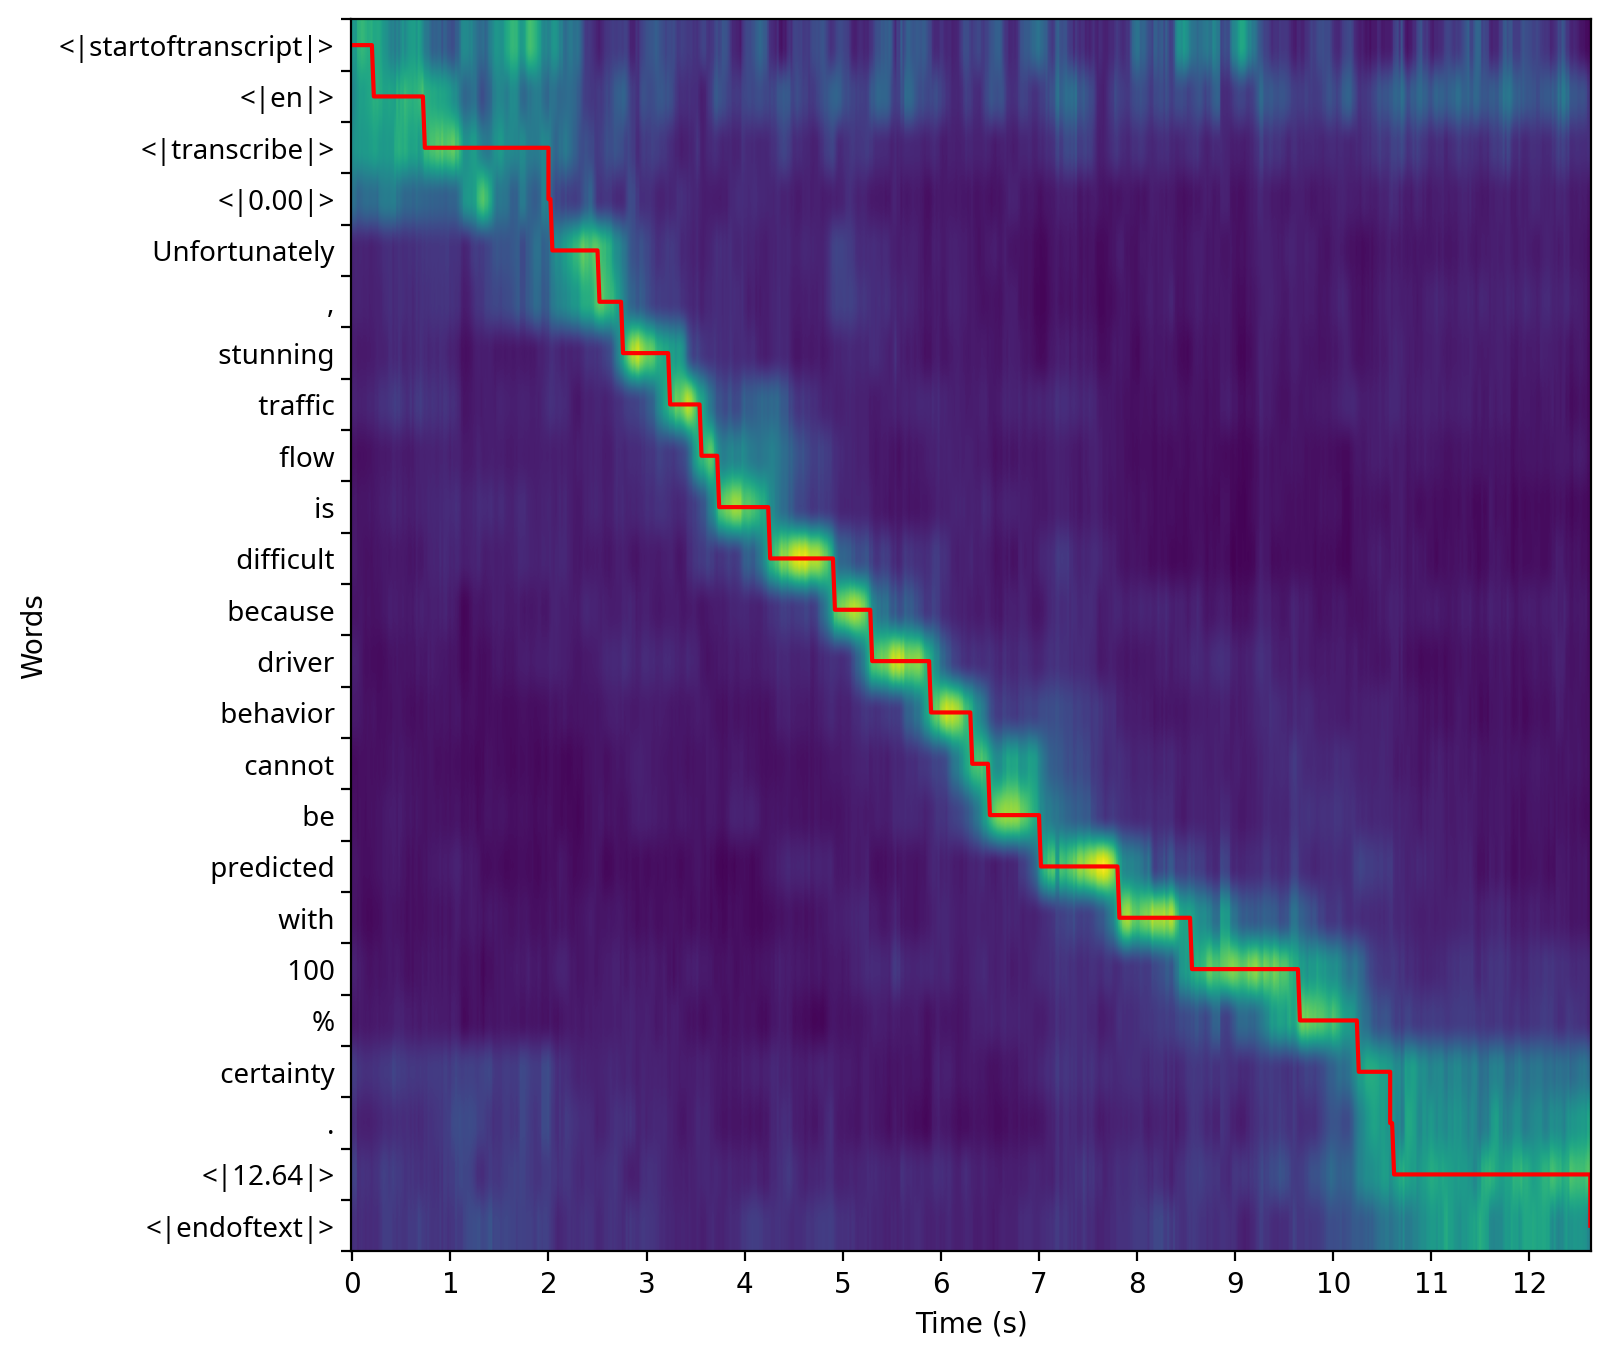

word  begin    end
0    Unfortunately   2.04   2.52
1         stunning   2.76   3.24
2          traffic   3.24   3.56
3             flow   3.56   3.74
4               is   3.74   4.26
5        difficult   4.26   4.92
6          because   4.92   5.30
7           driver   5.30   5.90
8         behavior   5.90   6.32
9           cannot   6.32   6.50
10              be   6.50   7.02
11       predicted   7.02   7.82
12            with   7.82   8.56
13             100   8.56   9.66
14               %   9.66  10.26
15       certainty  10.26  10.58

 Popular sports include football, basketball, volleyball, water polo, fencing, rugby, cycling, ice hockey, roller hockey, and F1 motor racing.


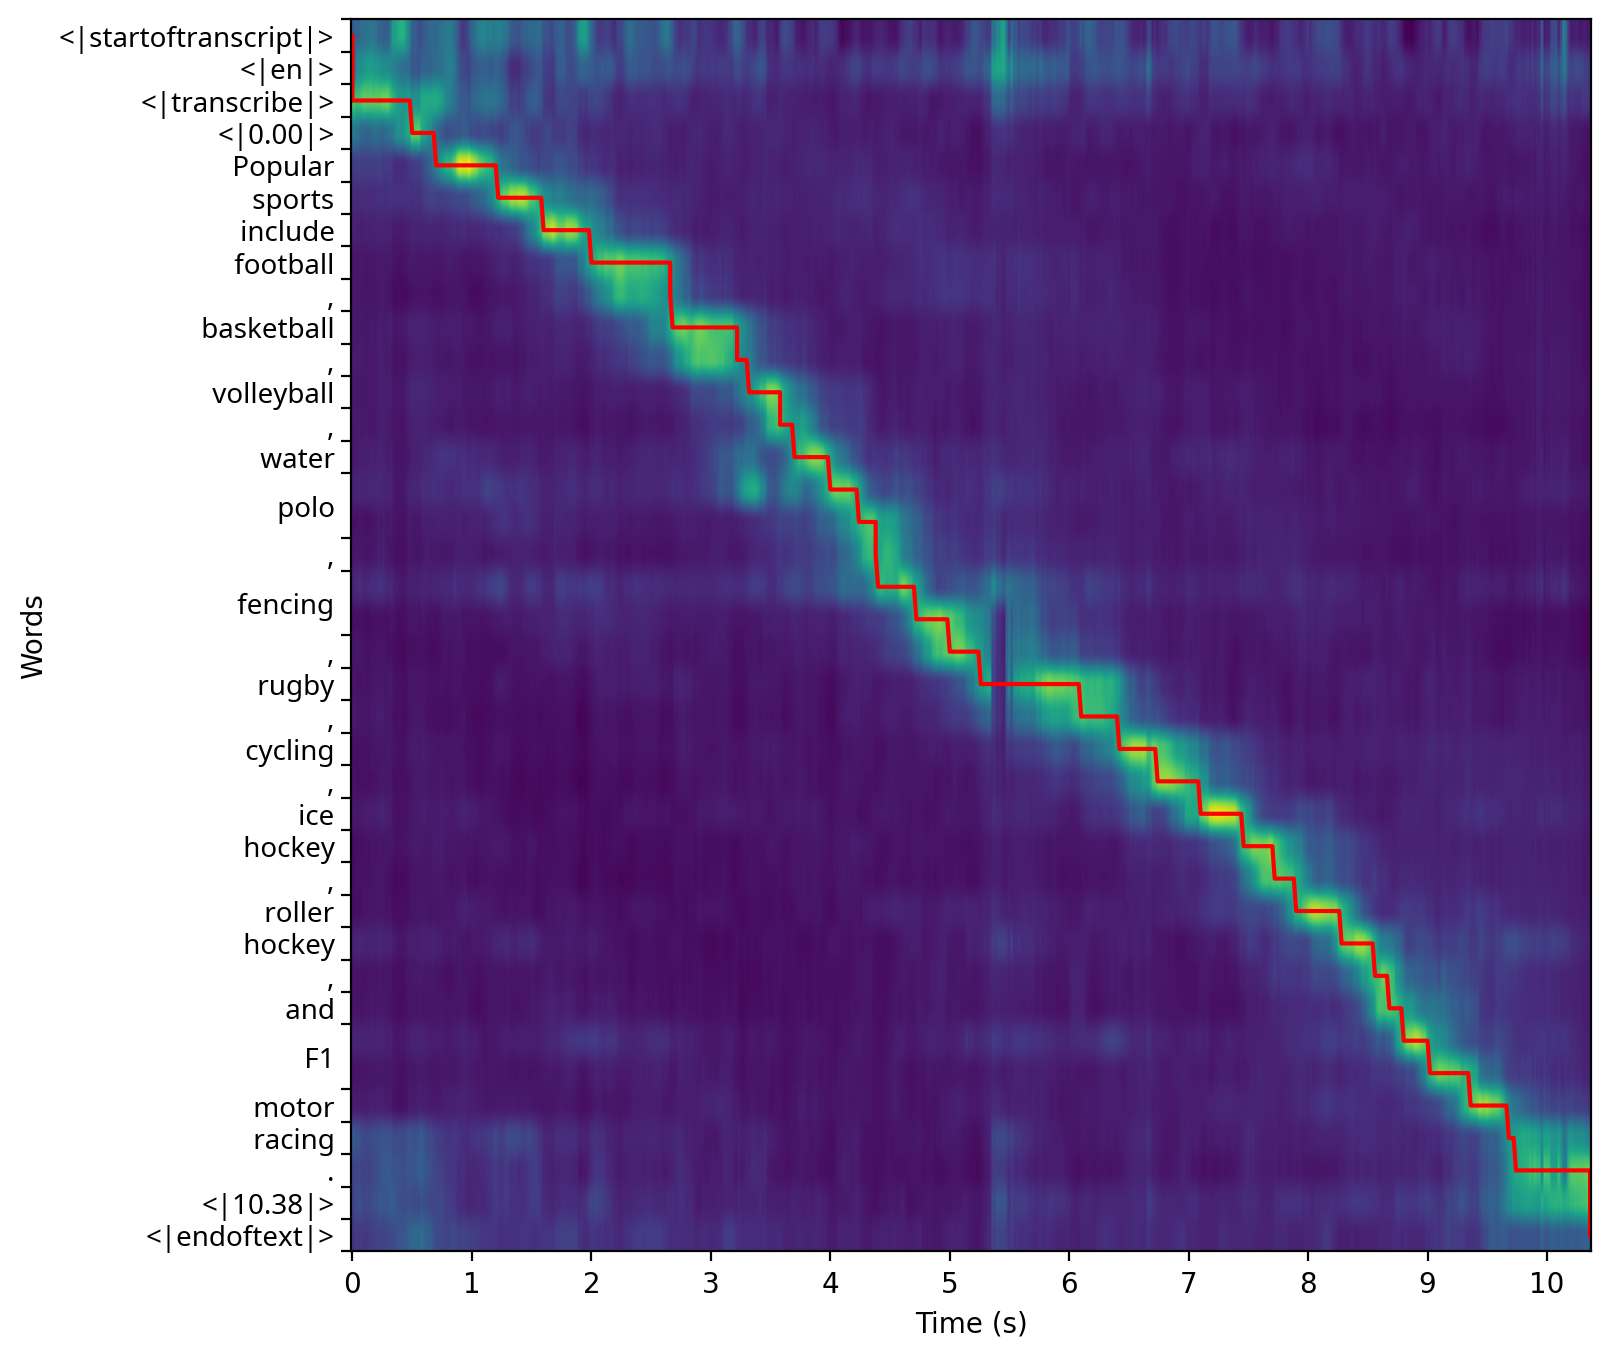

word  begin   end
0       Popular   0.70  1.22
1        sports   1.22  1.60
2       include   1.60  2.00
3      football   2.00  2.66
4    basketball   2.68  3.22
5    volleyball   3.32  3.58
6         water   3.70  4.00
7          polo   4.00  4.38
8       fencing   4.40  5.00
9         rugby   5.26  6.10
10      cycling   6.42  6.74
11          ice   7.10  7.46
12       hockey   7.46  7.72
13       roller   7.90  8.28
14       hockey   8.28  8.56
15          and   8.68  8.80
16           F1   8.80  9.36
17        motor   9.36  9.68
18       racing   9.68  9.74

 The governor's office and 19 of the injured were police officers.


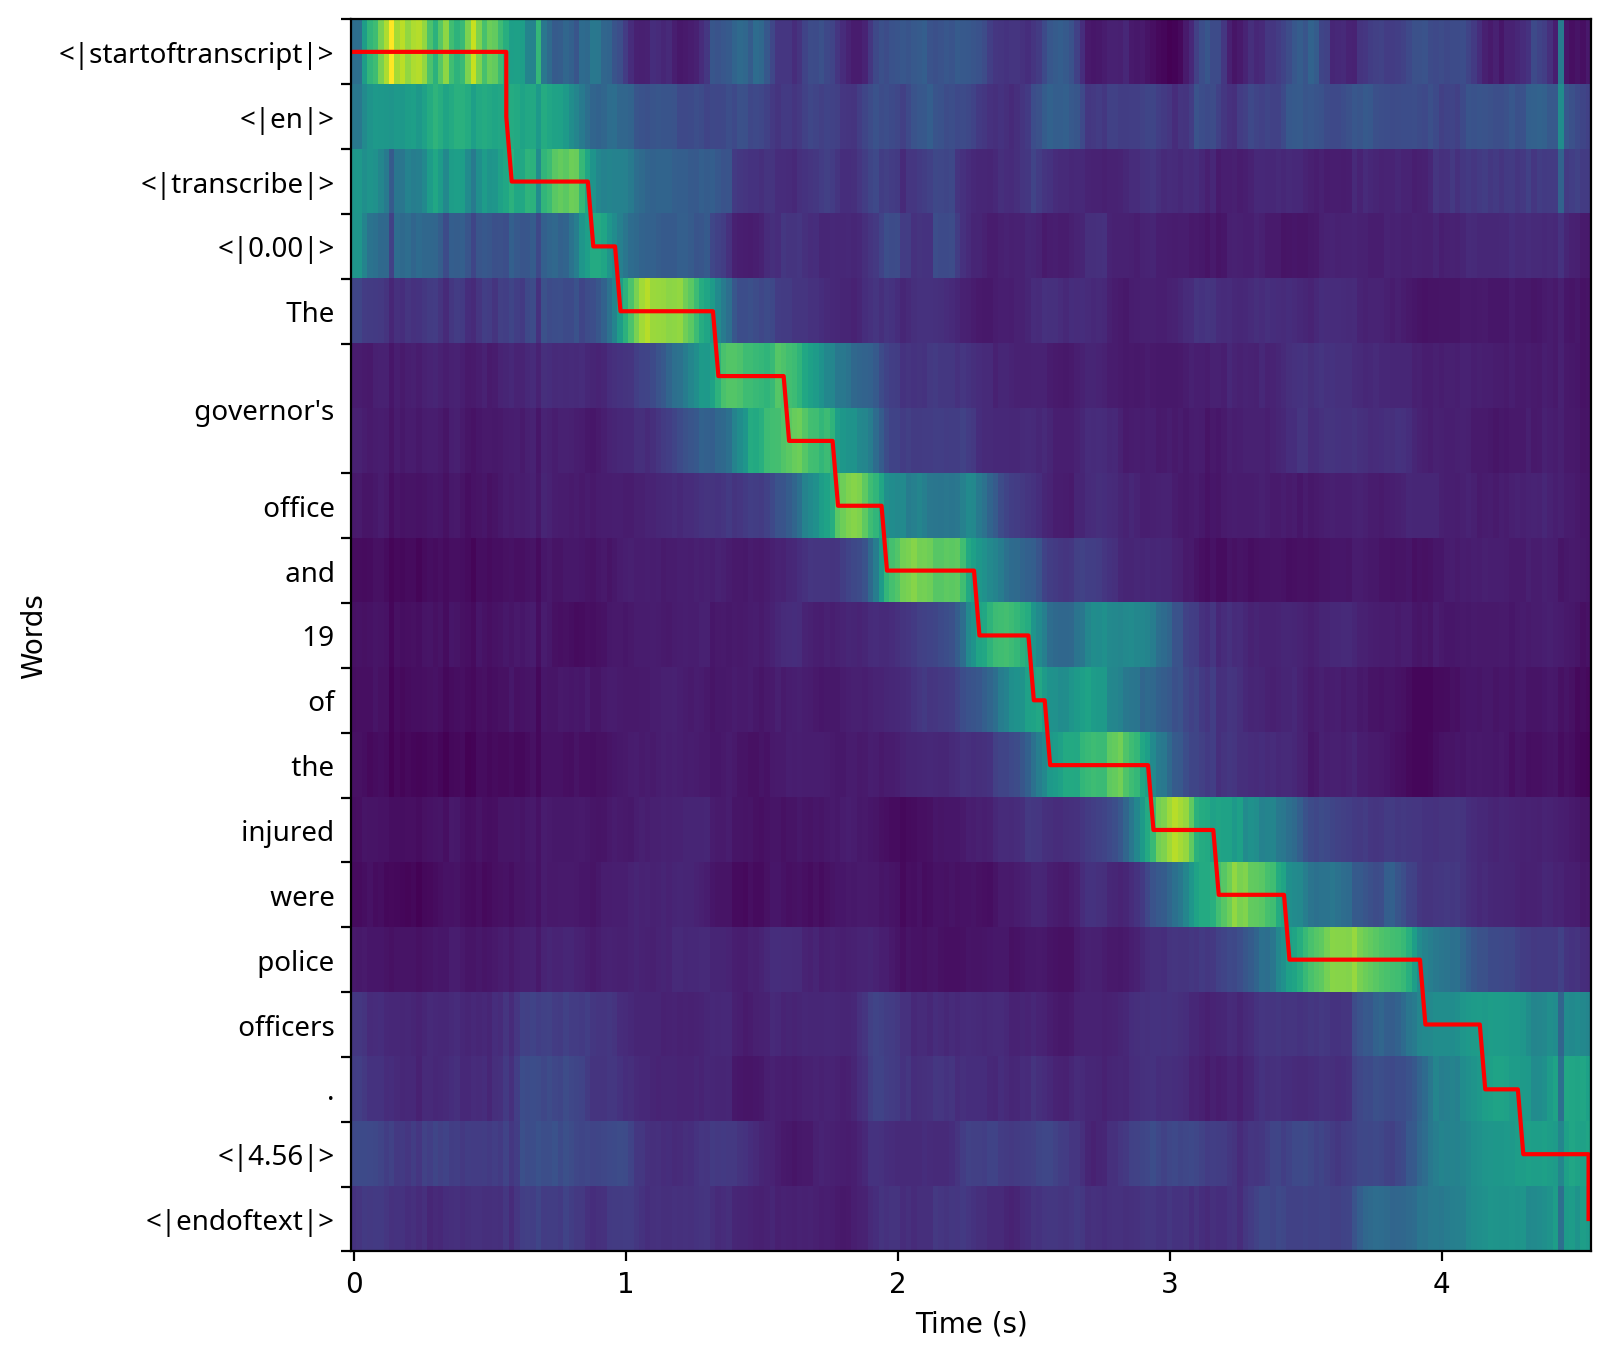

word  begin   end
0           The   0.98  1.34
1    governor's   1.34  1.78
2        office   1.78  1.96
3           and   1.96  2.30
4            19   2.30  2.50
5            of   2.50  2.56
6           the   2.56  2.94
7       injured   2.94  3.18
8          were   3.18  3.44
9        police   3.44  3.94
10     officers   3.94  4.16

 In its early days, the show was featured solely at the long-running internet radio site TokiNet Radio, a site focused on talk radio.


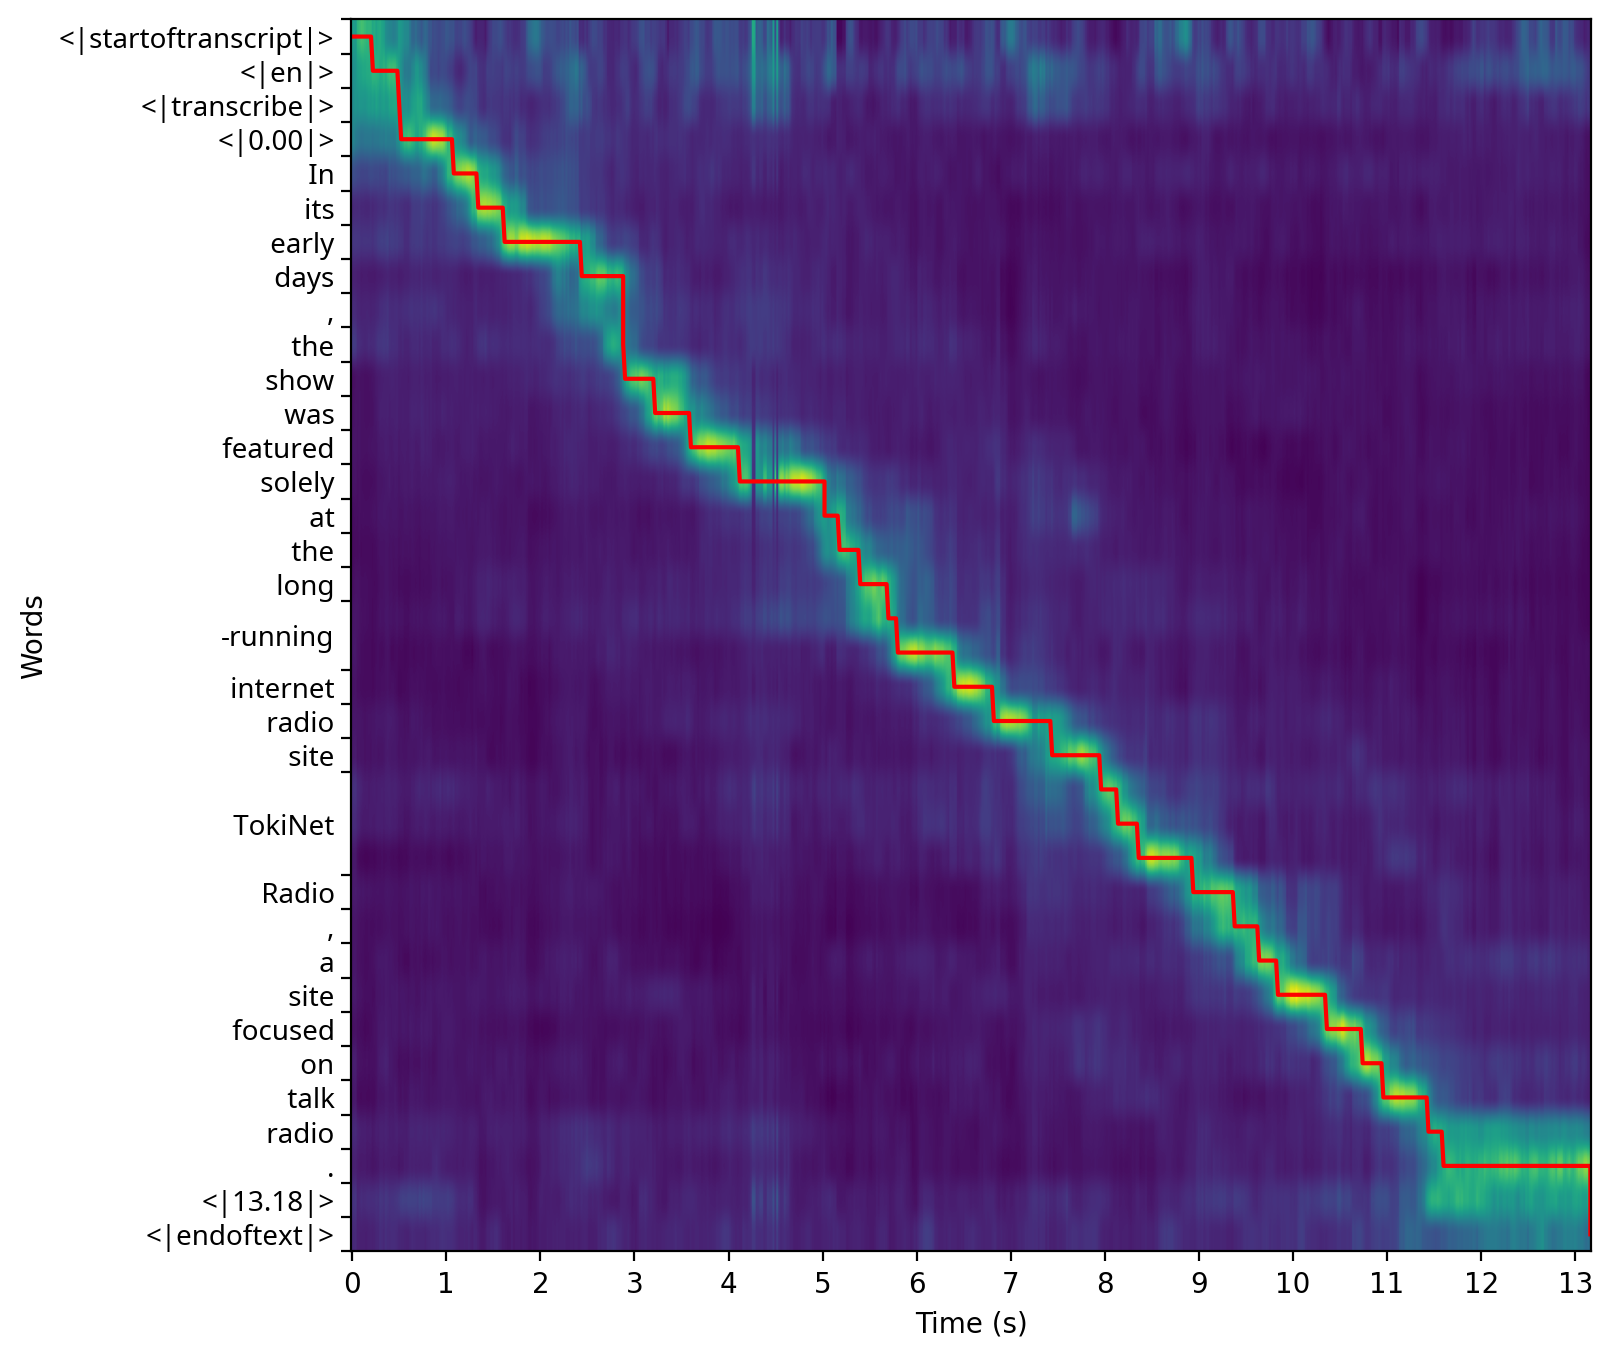

word  begin    end
0          In   1.08   1.34
1         its   1.34   1.62
2       early   1.62   2.44
3        days   2.44   2.88
4         the   2.88   2.90
5        show   2.90   3.22
6         was   3.22   3.60
7    featured   3.60   4.12
8      solely   4.12   5.02
9          at   5.02   5.18
10        the   5.18   5.40
11       long   5.40   5.70
12   -running   5.70   6.40
13   internet   6.40   6.82
14      radio   6.82   7.44
15       site   7.44   7.96
16    TokiNet   7.96   8.94
17      Radio   8.94   9.38
18          a   9.64   9.84
19       site   9.84  10.36
20    focused  10.36  10.74
21         on  10.74  10.96
22       talk  10.96  11.44
23      radio  11.44  11.60

 After the dam was built in 1963, the seasonal floods that would spread sediment throughout the river were halted.


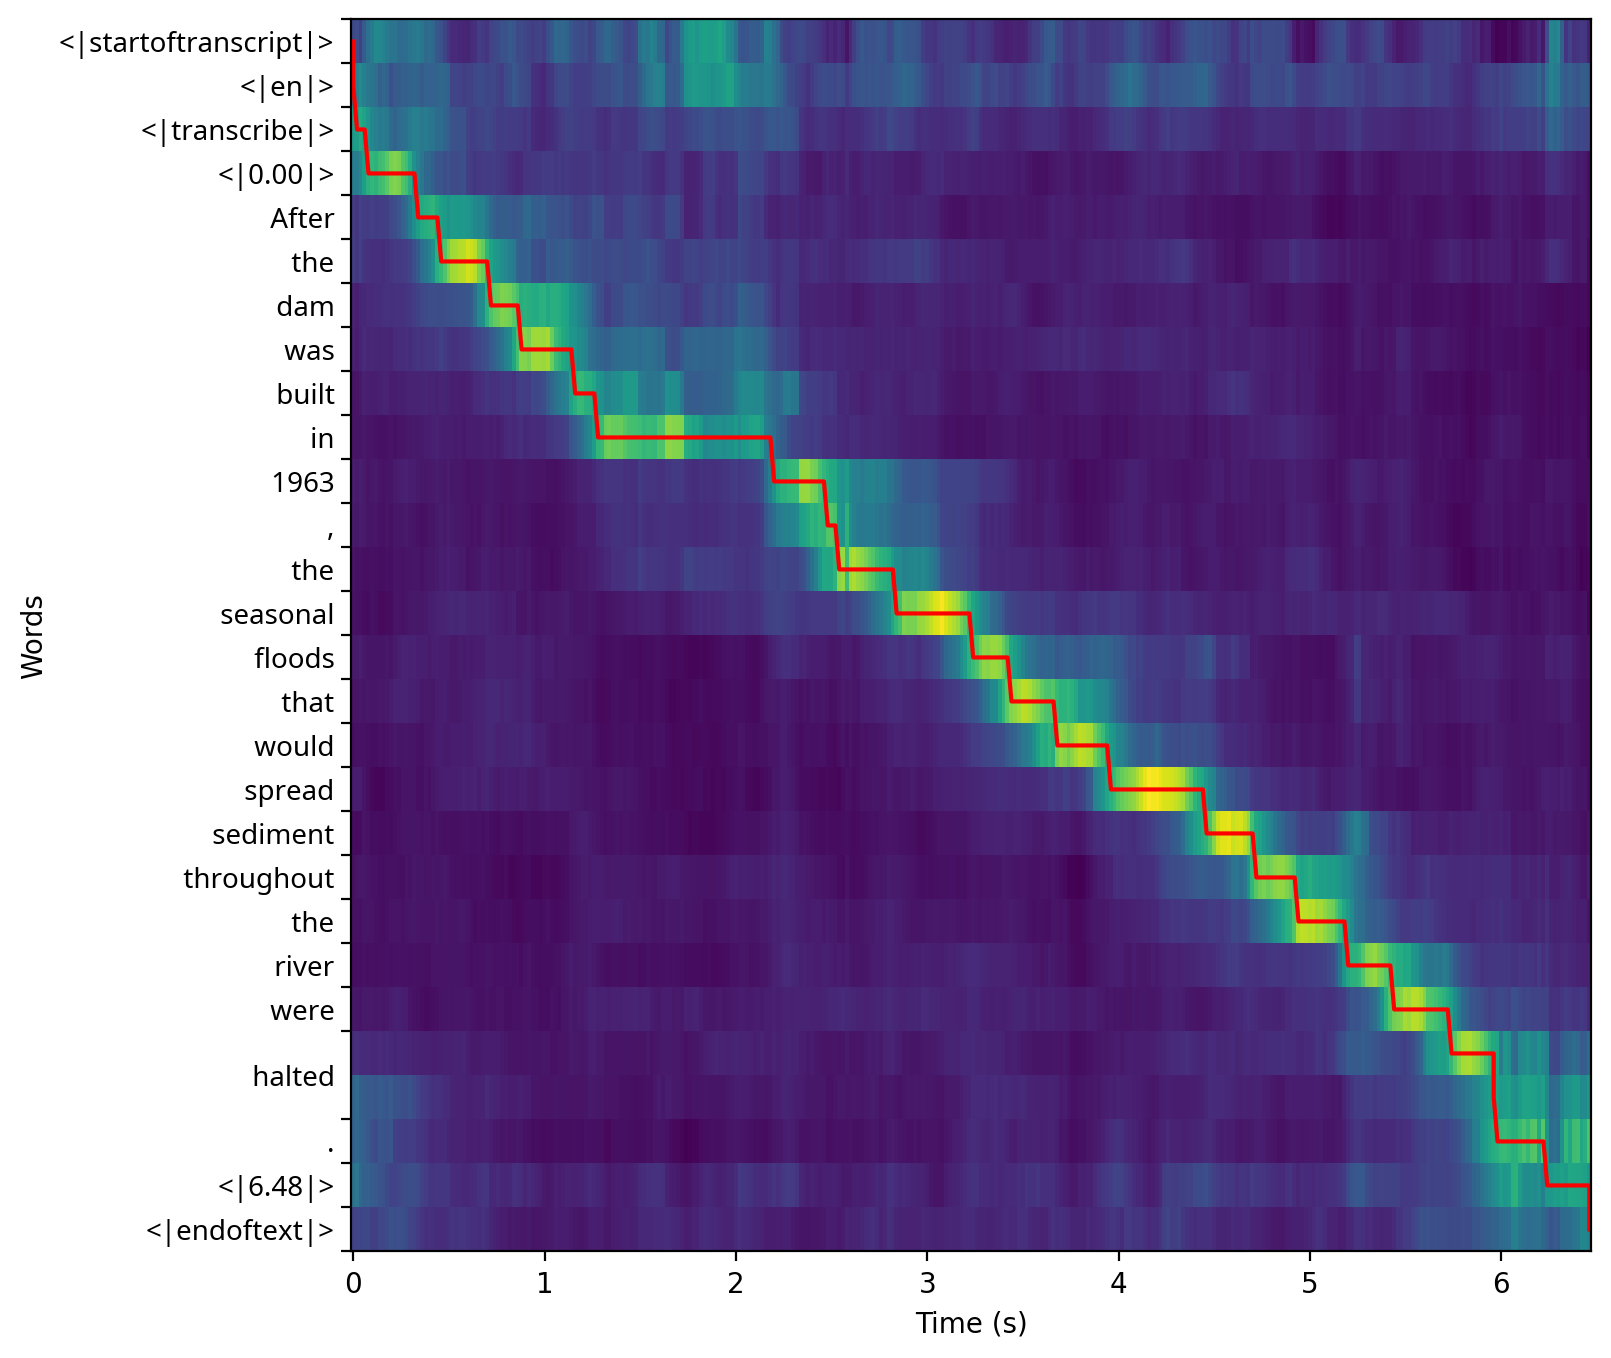

word  begin   end
0         After   0.34  0.46
1           the   0.46  0.72
2           dam   0.72  0.88
3           was   0.88  1.16
4         built   1.16  1.28
5            in   1.28  2.20
6          1963   2.20  2.48
7           the   2.54  2.84
8      seasonal   2.84  3.24
9        floods   3.24  3.44
10         that   3.44  3.68
11        would   3.68  3.96
12       spread   3.96  4.46
13     sediment   4.46  4.72
14   throughout   4.72  4.94
15          the   4.94  5.20
16        river   5.20  5.44
17         were   5.44  5.74
18       halted   5.74  5.98

 First, most riders were riding boots with a heel on a smooth, quite narrow sole.


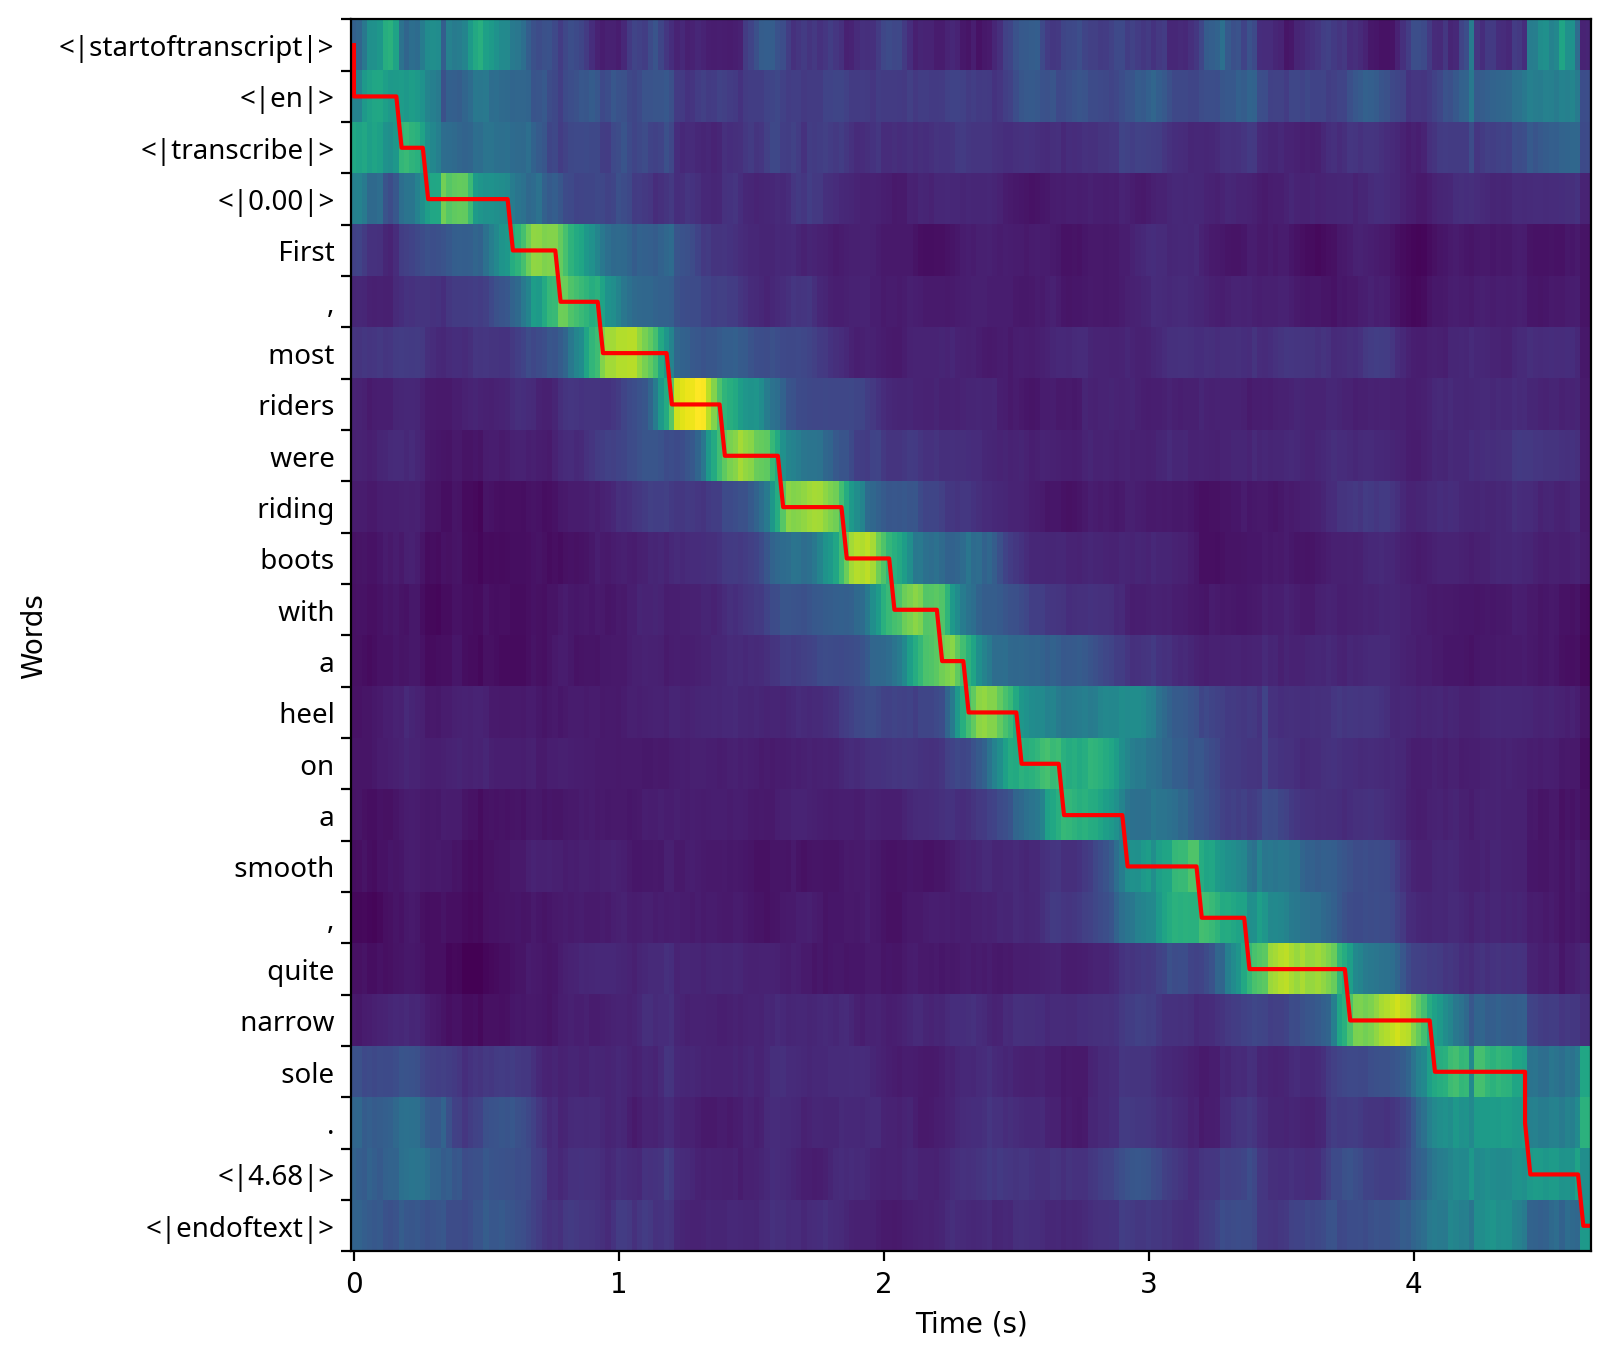

word  begin   end
0     First   0.60  0.78
1      most   0.94  1.20
2    riders   1.20  1.40
3      were   1.40  1.62
4    riding   1.62  1.86
5     boots   1.86  2.04
6      with   2.04  2.22
7         a   2.22  2.32
8      heel   2.32  2.52
9        on   2.52  2.68
10        a   2.68  2.92
11   smooth   2.92  3.20
12    quite   3.38  3.76
13   narrow   3.76  4.08
14     sole   4.08  4.42

 In the warm climate of the Middle East, the house was not so important.


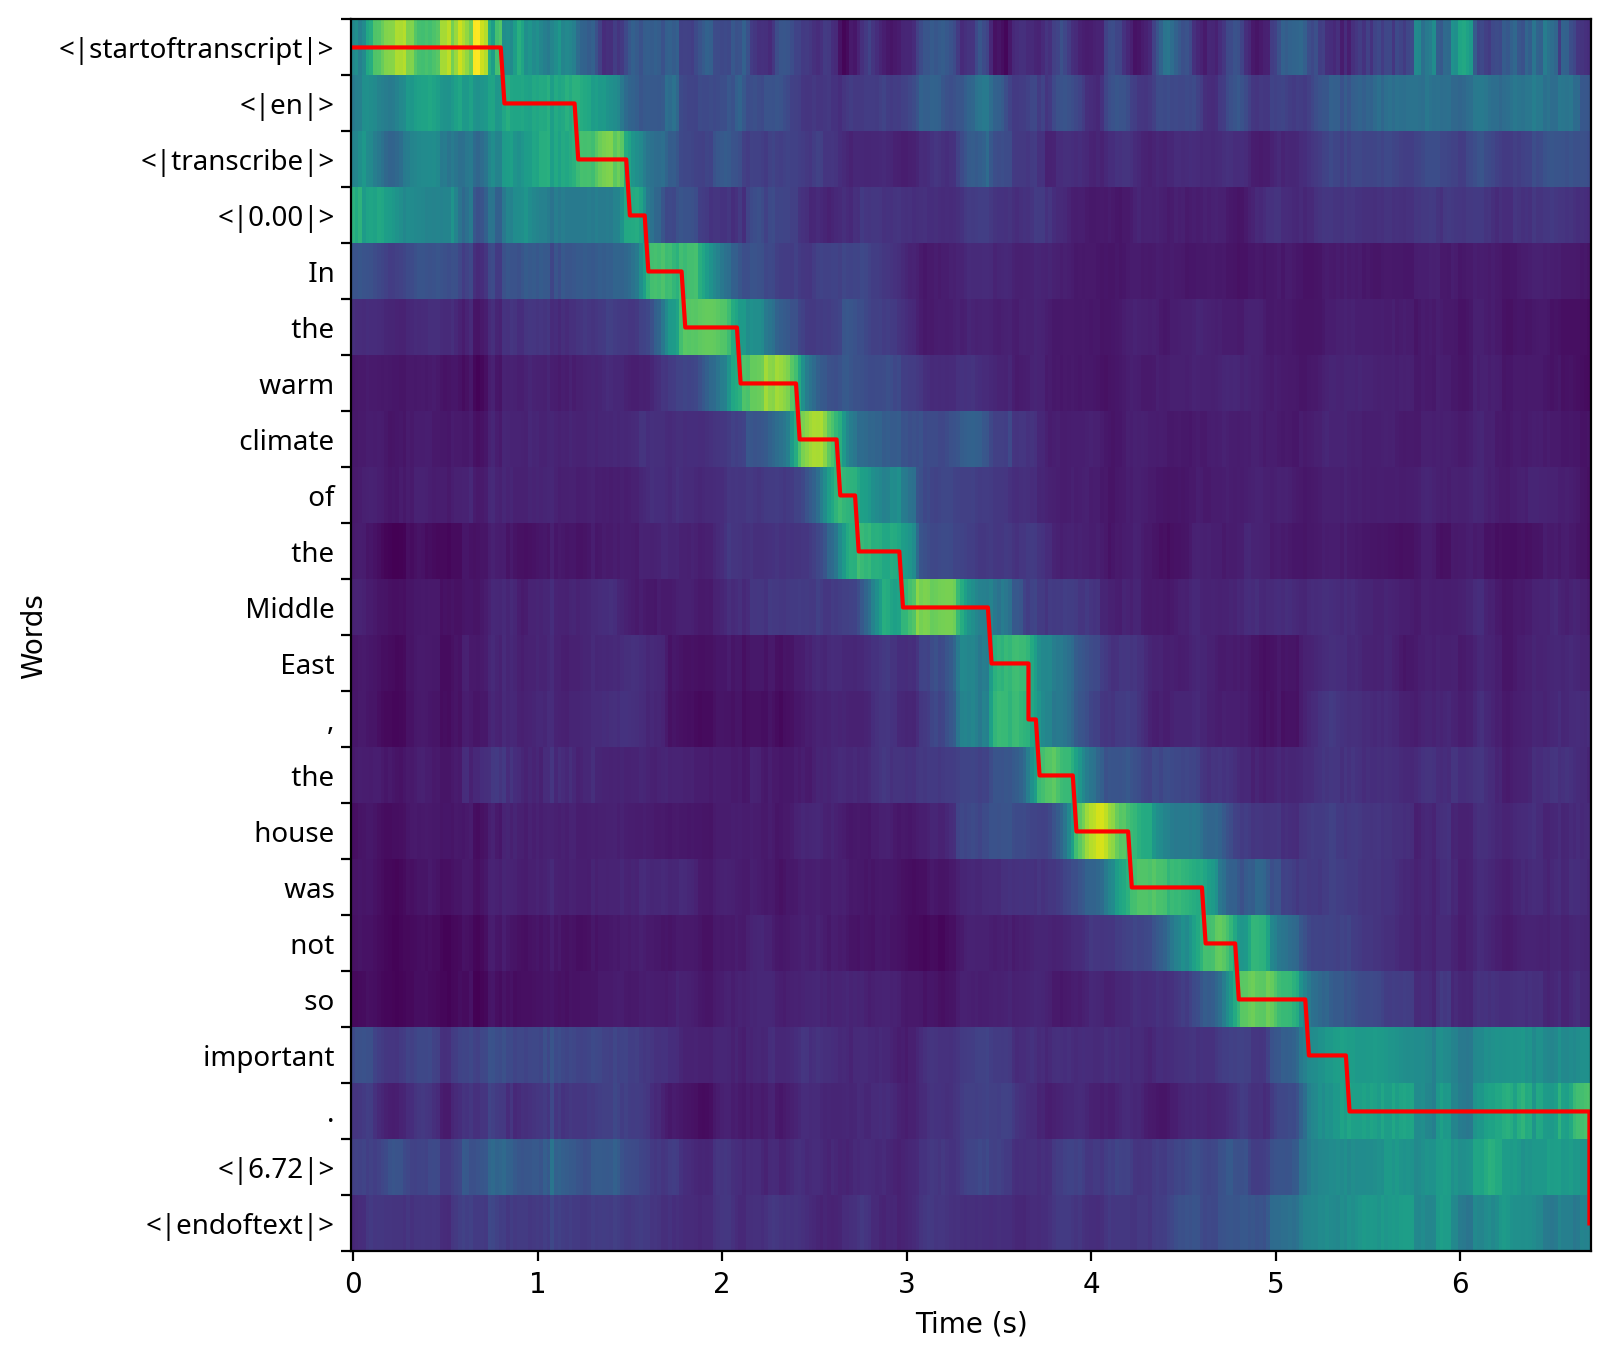

word  begin   end
0           In   1.60  1.80
1          the   1.80  2.10
2         warm   2.10  2.42
3      climate   2.42  2.64
4           of   2.64  2.74
5          the   2.74  2.98
6       Middle   2.98  3.46
7         East   3.46  3.66
8          the   3.72  3.92
9        house   3.92  4.22
10         was   4.22  4.62
11         not   4.62  4.80
12          so   4.80  5.18
13   important   5.18  5.40

 Although AI has a strong connotation of science fiction, AI forms a very important branch of computer science, dealing with behavior, learning, and intelligent adaptation in a machine.


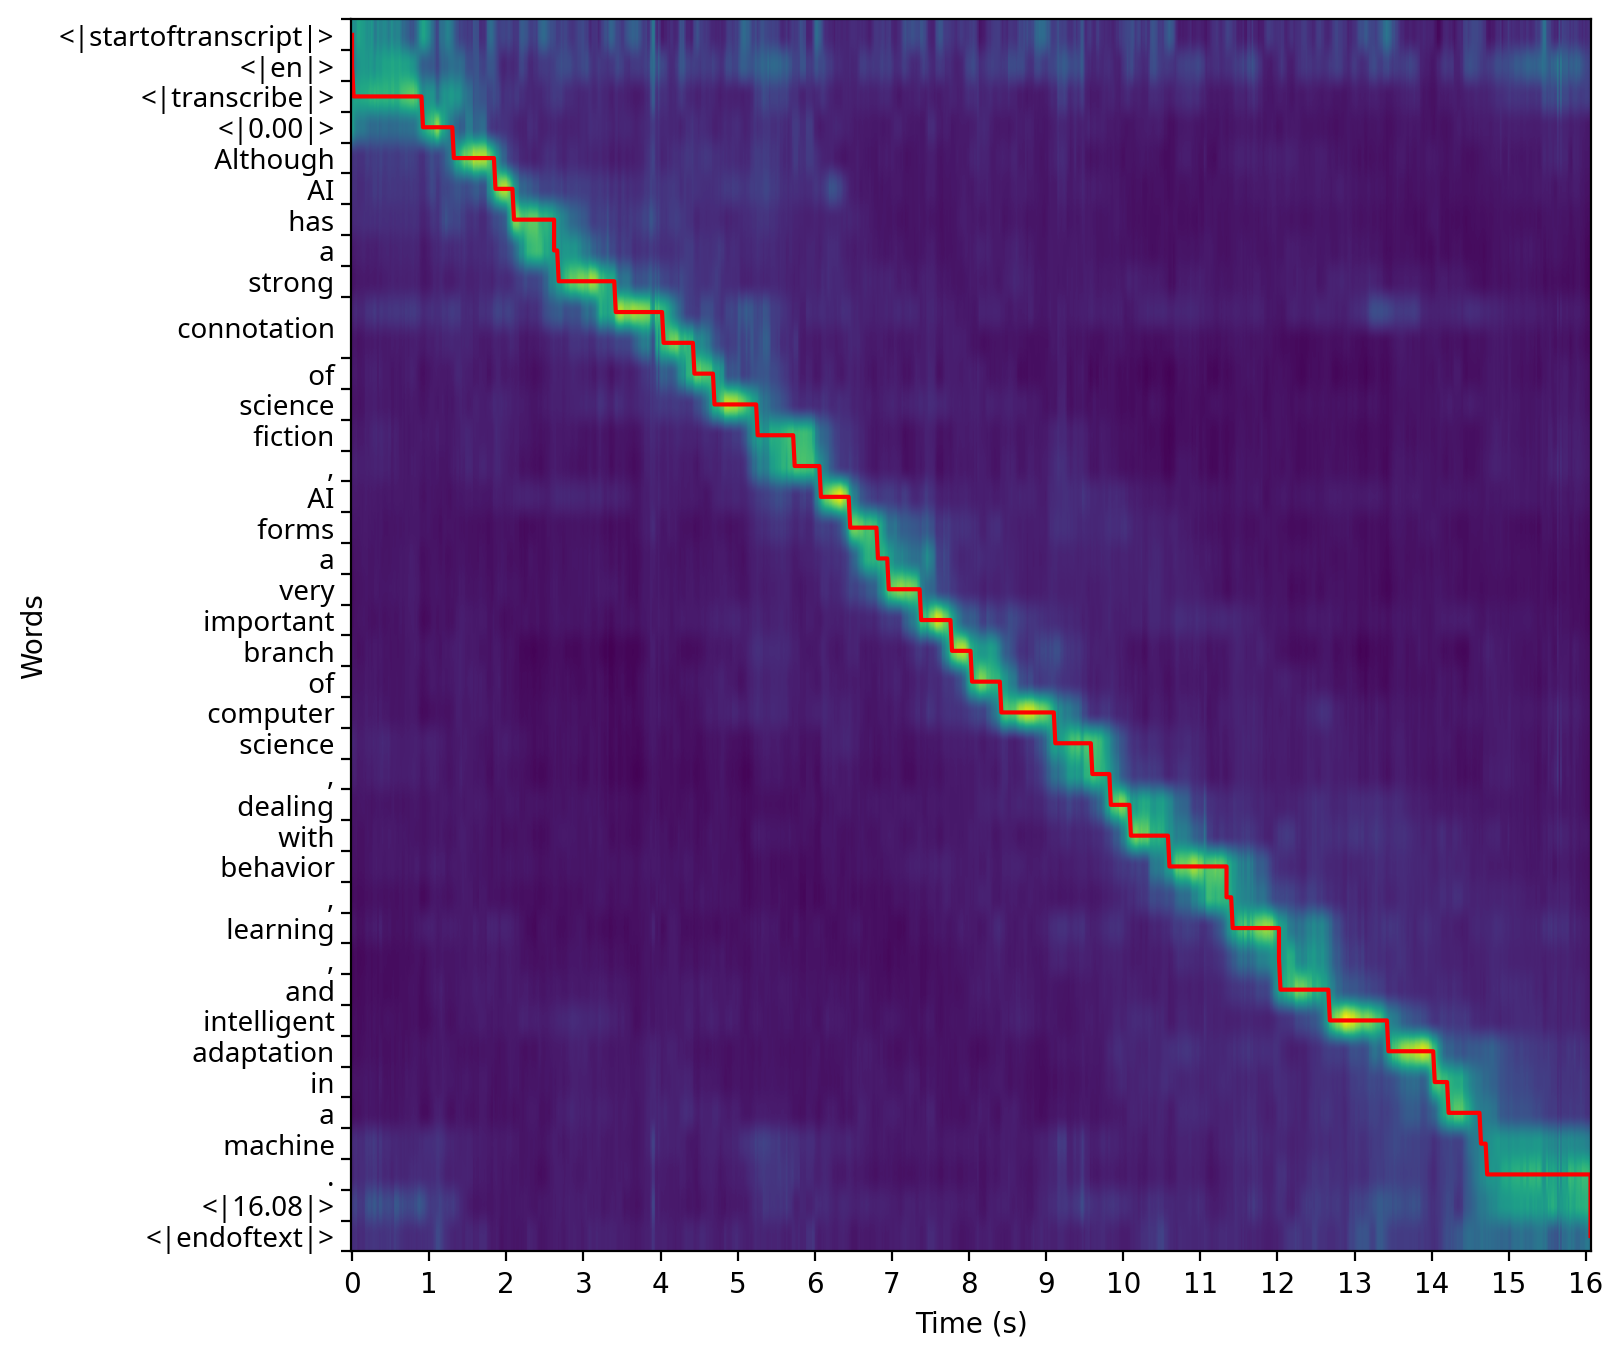

word  begin    end
0       Although   1.32   1.86
1             AI   1.86   2.10
2            has   2.10   2.62
3              a   2.62   2.68
4         strong   2.68   3.42
5    connotation   3.42   4.44
6             of   4.44   4.70
7        science   4.70   5.26
8        fiction   5.26   5.74
9             AI   6.08   6.46
10         forms   6.46   6.82
11             a   6.82   6.96
12          very   6.96   7.38
13     important   7.38   7.78
14        branch   7.78   8.04
15            of   8.04   8.42
16      computer   8.42   9.12
17       science   9.12   9.60
18       dealing   9.84  10.10
19          with  10.10  10.60
20      behavior  10.60  11.34
21      learning  11.42  12.02
22           and  12.04  12.68
23   intelligent  12.68  13.44
24    adaptation  13.44  14.04
25            in  14.04  14.22
26             a  14.22  14.64
27       machine  14.64  14.72

 When all available resources are effectively used across the functional departments of an organization, creativity and ingenuity can transpire.


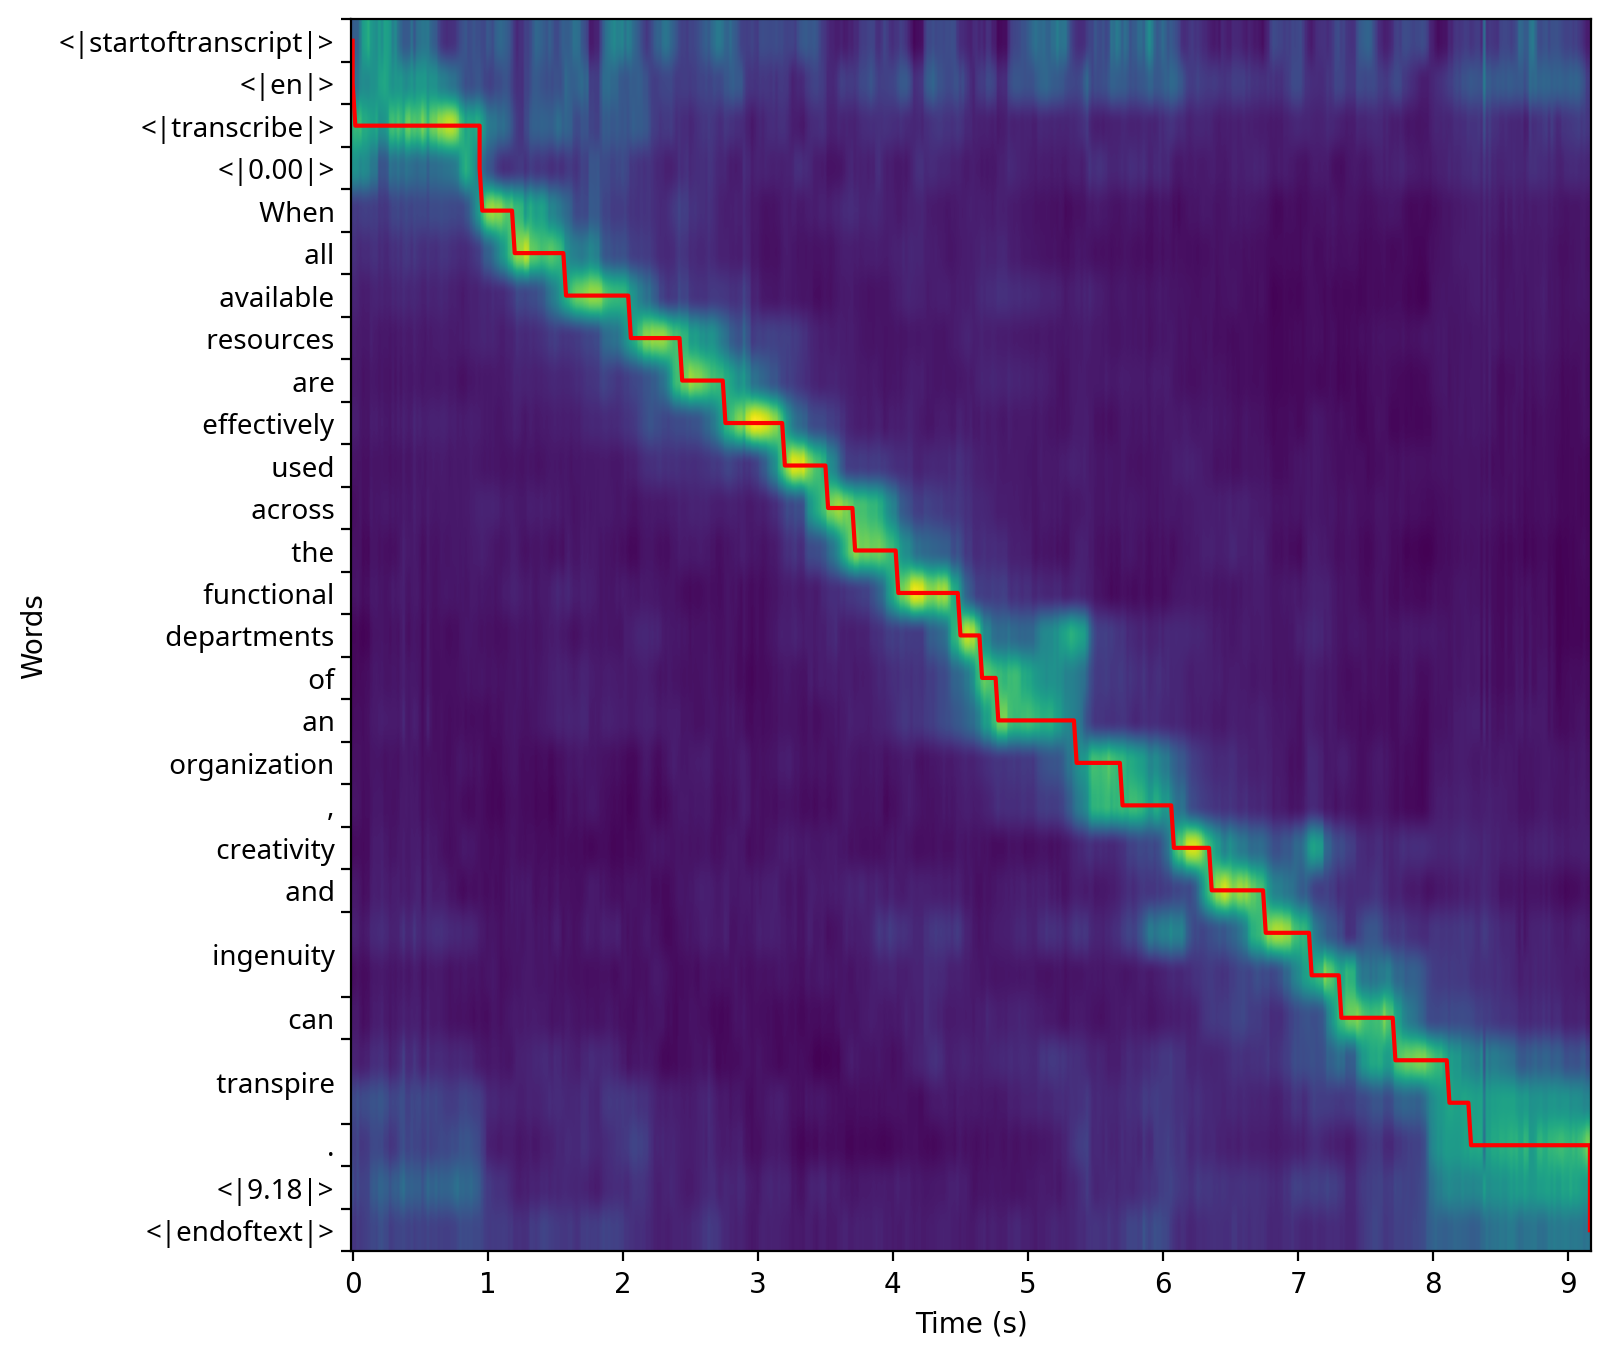

word  begin   end
0            When   0.96  1.20
1             all   1.20  1.58
2       available   1.58  2.06
3       resources   2.06  2.44
4             are   2.44  2.76
5     effectively   2.76  3.20
6            used   3.20  3.52
7          across   3.52  3.72
8             the   3.72  4.04
9      functional   4.04  4.50
10    departments   4.50  4.66
11             of   4.66  4.78
12             an   4.78  5.36
13   organization   5.36  5.70
14     creativity   6.08  6.36
15            and   6.36  6.76
16      ingenuity   6.76  7.32
17            can   7.32  7.72
18      transpire   7.72  8.28

 During the struggle for independence, organized by the Mao movement, a peaceful gathering in the town resulted in the killing of the paramount chief, Tupua Tomasese Leolofi III.


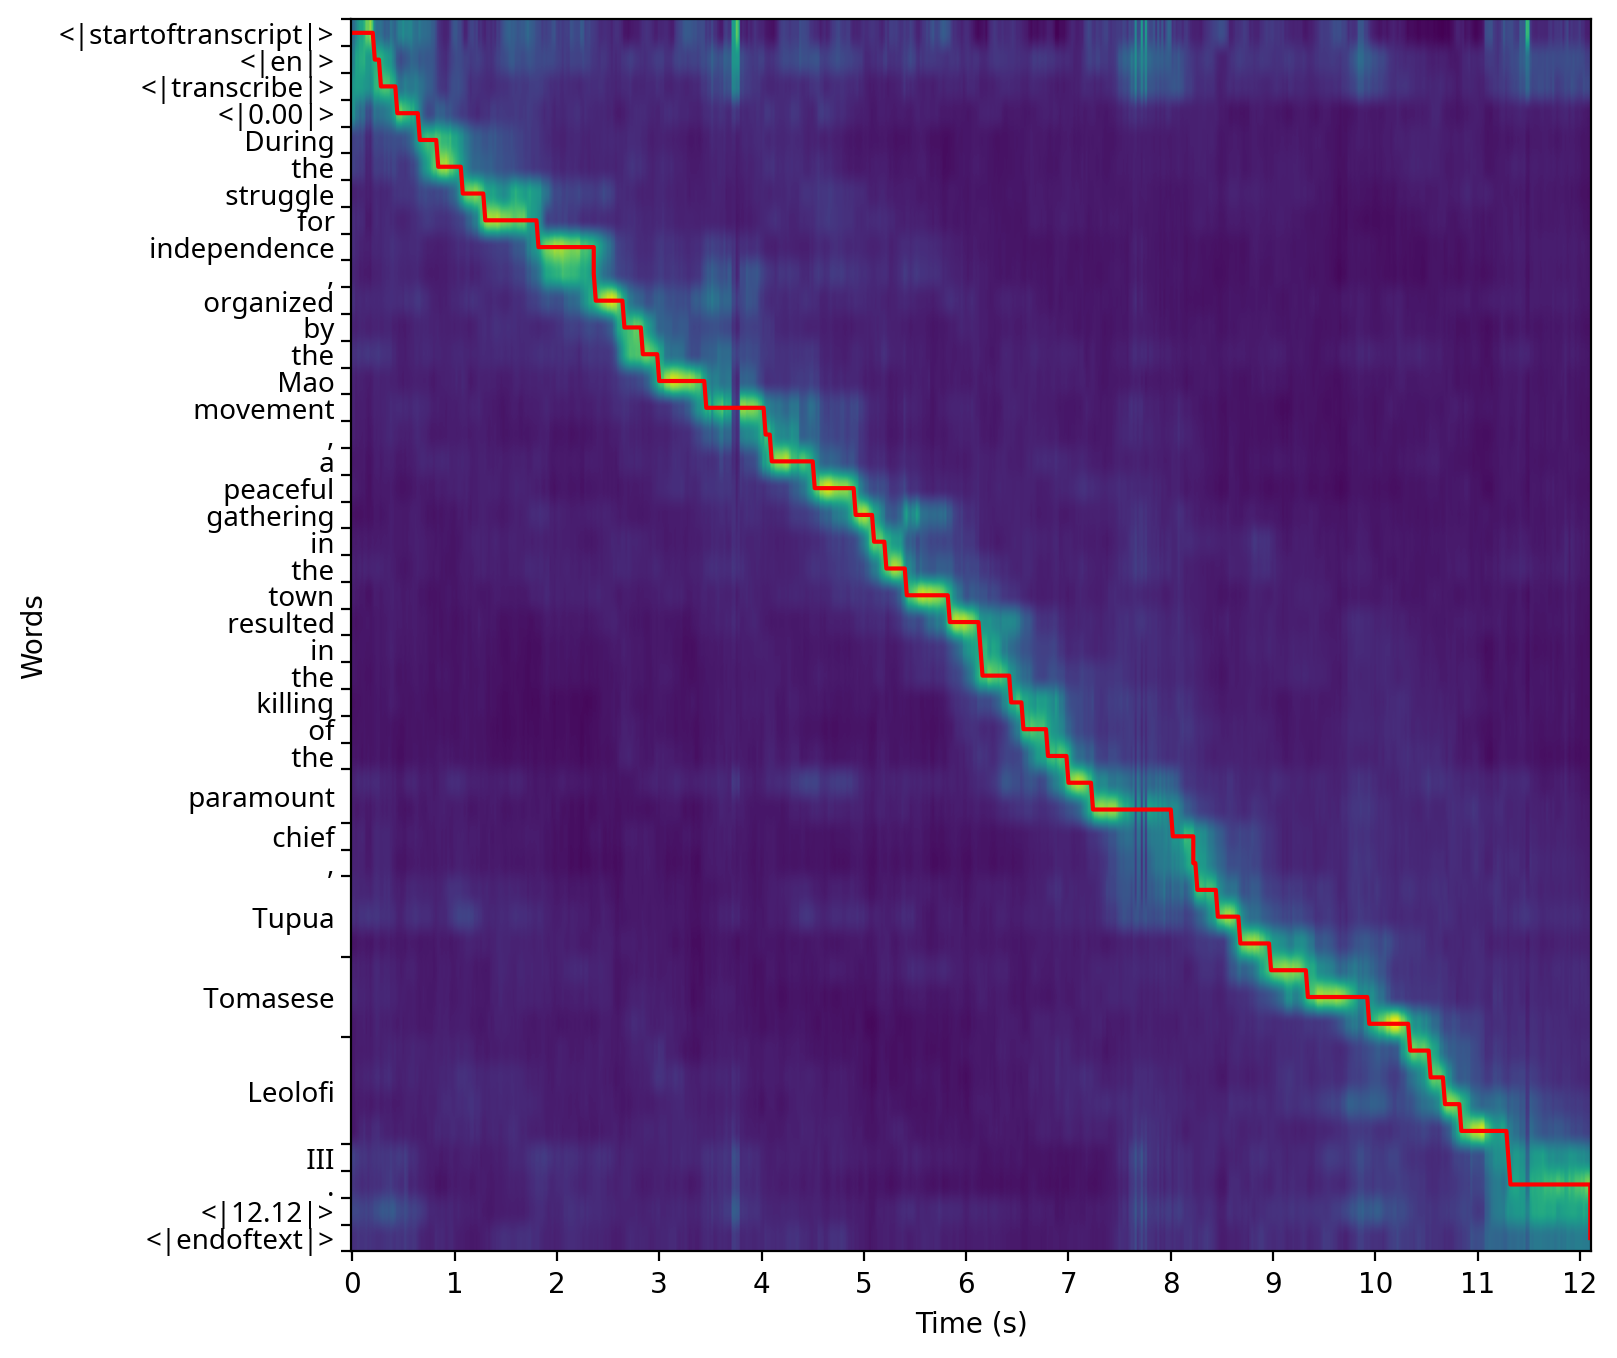

word  begin    end
0          During   0.66   0.84
1             the   0.84   1.08
2        struggle   1.08   1.30
3             for   1.30   1.82
4    independence   1.82   2.36
5       organized   2.38   2.66
6              by   2.66   2.84
7             the   2.84   3.00
8             Mao   3.00   3.46
9        movement   3.46   4.04
10              a   4.10   4.52
11       peaceful   4.52   4.92
12      gathering   4.92   5.10
13             in   5.10   5.22
14            the   5.22   5.42
15           town   5.42   5.84
16       resulted   5.84   6.14
17             in   6.14   6.16
18            the   6.16   6.44
19        killing   6.44   6.56
20             of   6.56   6.80
21            the   6.80   7.00
22      paramount   7.00   8.02
23          chief   8.02   8.22
24          Tupua   8.26   8.98
25       Tomasese   8.98  10.34
26        Leolofi  10.34  11.30
27            III  11.30  11.32

In [32]:
# for the first 10 examples in the dataset
for (audio, label), transcription in zip(dataset, transcriptions[:10]):
    print(transcription)
  
    duration = len(audio)
    mel = whisper.log_mel_spectrogram(whisper.pad_or_trim(audio))
    tokens = torch.tensor(
        [
            *tokenizer.sot_sequence,
            tokenizer.timestamp_begin,
        ] + tokenizer.encode(transcription) + [
            tokenizer.timestamp_begin + duration // AUDIO_SAMPLES_PER_TOKEN,
            tokenizer.eot,
        ]
    )
    with torch.no_grad():
        logits = model(mel.unsqueeze(0), tokens.unsqueeze(0))

    weights = torch.cat(QKs)  # layers * heads * tokens * frames    
    weights = weights[:, :, :, : duration // AUDIO_SAMPLES_PER_TOKEN].cpu()
    weights = median_filter(weights, (1, 1, 1, medfilt_width))
    weights = torch.tensor(weights * qk_scale).softmax(dim=-1)
    
    w = weights / weights.norm(dim=-2, keepdim=True)
    matrix = w[-6:].mean(axis=(0, 1))

    alignment = dtw(-matrix.double().numpy())

    jumps = np.pad(np.diff(alignment.index1s), (1, 0), constant_values=1).astype(bool)
    jump_times = alignment.index2s[jumps] * AUDIO_TIME_PER_TOKEN
    words, word_tokens = split_tokens(tokens)

    # display the normalized attention weights and the alignment
    plt.figure(figsize=(8, 8))
    plt.imshow(matrix, aspect="auto")
    plt.plot(alignment.index2s, alignment.index1s, color="red")

    xticks = np.arange(0, matrix.shape[1], 1 / AUDIO_TIME_PER_TOKEN)
    xticklabels = (xticks * AUDIO_TIME_PER_TOKEN).round().astype(np.int32) 
    plt.xticks(xticks, xticklabels)
    plt.xlabel("Time (s)")
    
    # display tokens and words as tick labels
    ylims = plt.gca().get_ylim()

    ax = plt.gca()
    ax.tick_params('both', length=0, width=0, which='minor', pad=6)

    ax.yaxis.set_ticks_position("left")
    ax.yaxis.set_label_position("left")
    ax.invert_yaxis()
    ax.set_ylim(ylims)

    major_ticks = [-0.5]
    minor_ticks = []
    current_y = 0
    
    for word, word_token in zip(words, word_tokens):
        minor_ticks.append(current_y + len(word_token) / 2 - 0.5)
        current_y += len(word_token)
        major_ticks.append(current_y - 0.5)
        
    ax.yaxis.set_minor_locator(ticker.FixedLocator(minor_ticks))
    ax.yaxis.set_minor_formatter(ticker.FixedFormatter(words))
    ax.set_yticks(major_ticks)
    ax.yaxis.set_major_formatter(ticker.NullFormatter())
    
    for label in ax.get_yminorticklabels():
        label.set_fontproperties(prop)

    plt.ylabel("Words")
    plt.show()

    # display the word-level timestamps in a table
    word_boundaries = np.pad(np.cumsum([len(t) for t in word_tokens[:-1]]), (1, 0))
    begin_times = jump_times[word_boundaries[:-1]]
    end_times = jump_times[word_boundaries[1:]]

    data = [
        dict(word=word, begin=begin, end=end)
        for word, begin, end in zip(words[:-1], begin_times, end_times)
        if not word.startswith("<|") and word.strip() not in ".,!?、。"
    ]

    display(pd.DataFrame(data))
    display(HTML("<hr>"))